In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [42]:
df = pd.read_csv("House price assignment/dataset.csv")
test = pd.read_csv("House price assignment/test.csv")
test.head()

,id,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,zoning,subdivision,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,200000,12/15/2022,4.0,,new,2025,47.4794,-122.2212,25,RENTON,R-8,TOWN-COUNTRY CLUB BUNGALOW SITES,2,320000,588000,2019,0,4127,2770,1130,0,8,0,3,2.0,4,1,1,1,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,J
1,200001,10/15/2000,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,R1,NaN,2,491000,1302000,2000,0,29029,3570,1750,0,11,0,3,2.0,4,3,0,0,0,920,0,0,0,1,0,0,0,0,0,0,0,0,0,0,O
2,200002,6/15/2004,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,R-3.5,SOMERSET NO. 08,2,1292000,403000,1967,0,8700,1900,1900,0,8,0,4,1.0,4,1,1,0,0,510,0,0,0,0,0,3,0,3,3,0,2,0,0,0,R
3,200003,11/15/2009,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,LR1 (M1),NEVINS DIV OF GREEN LAKE ADD,2,500000,291000,1965,0,5100,1980,1270,710,7,6,3,1.0,3,1,1,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B
4,200004,6/15/1999,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,RA2.5P,NaN,2,124000,277000,1920,1983,47480,3150,990,960,8,6,3,1.5,3,1,2,0,0,0,3,0,0,0,0,0,2,4,0,3,0,0,0,0,H


In [ ]:
data = df.drop(columns=["id","sale_warning","latitude","longitude"])


In [7]:
data.corr(numeric_only=True)['sale_price'].sort_values(ascending=False)

sale_price          1.000000
sqft                0.466253
grade               0.464287
imp_val             0.455197
land_val            0.412339
sqft_1              0.304217
sale_nbr            0.278285
view_territorial    0.235627
bath_full           0.226203
beds                0.225255
view_lakewash       0.202914
stories             0.201907
sqft_fbsmt          0.199307
bath_3qtr           0.177927
fbsmt_grade         0.162477
view_olympics       0.136046
gara_sqft           0.134983
bath_half           0.131710
view_sound          0.116935
view_cascades       0.112510
view_skyline        0.110273
year_reno           0.110225
view_lakesamm       0.107503
sqft_lot            0.092662
wfnt                0.086279
view_other          0.068316
year_built          0.062517
greenbelt           0.058867
golf                0.044654
view_rainier        0.038727
view_otherwater     0.036962
garb_sqft           0.033891
condition           0.025274
area                0.000682
noise_traffic 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sale_date         200000 non-null  object 
 1   sale_price        200000 non-null  int64  
 2   sale_nbr          157818 non-null  float64
 3   join_status       200000 non-null  object 
 4   join_year         200000 non-null  int64  
 5   area              200000 non-null  int64  
 6   city              200000 non-null  object 
 7   zoning            200000 non-null  object 
 8   subdivision       182450 non-null  object 
 9   present_use       200000 non-null  int64  
 10  land_val          200000 non-null  int64  
 11  imp_val           200000 non-null  int64  
 12  year_built        200000 non-null  int64  
 13  year_reno         200000 non-null  int64  
 14  sqft_lot          200000 non-null  int64  
 15  sqft              200000 non-null  int64  
 16  sqft_1            20

In [9]:
data.describe(include="all")

,sale_date,sale_price,sale_nbr,join_status,join_year,area,city,zoning,subdivision,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
count,200000,2.000000e+05,157818.000000,200000,200000.000000,200000.000000,200000,200000,182450,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,198283
unique,313,NaN,NaN,8,NaN,NaN,40,500,10376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
top,6/15/2004,NaN,NaN,nochg,NaN,NaN,SEATTLE,NR3,MAPLE LEAF TO GREEN LAKE CIRCLE POR OF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
freq,1221,NaN,NaN,126281,NaN,NaN,59001,28800,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21002
mean,NaN,5.841495e+05,2.162599,NaN,2023.403600,48.644215,NaN,NaN,NaN,4.108860,4.601691e+05,4.917715e+05,1974.184760,59.468830,1.378310e+04,2120.679850,1251.284280,293.238535,7.667290,2.811045,3.515745,1.523778,3.419390,1.579735,0.494115,0.493020,80.32632,274.151470,0.078620,0.006220,0.033505,0.198130,0.017940,0.053985,0.058800,0.215550,0.018425,0.055565,0.050075,0.014090,0.020875,0.013455,NaN
std,NaN,4.170595e+05,1.113090,NaN,6.241643,27.132002,NaN,NaN,NaN,7.199323,3.510444e+05,3.680505e+05,30.544426,339.334129,3.793152e+04,909.799433,468.094648,443.577947,1.153746,3.556495,0.704148,0.526367,0.897639,0.672685,0.638183,0.525635,180.13173,288.338763,0.757477,0.078622,0.179952,0.548412,0.218994,0.379119,0.381868,0.724224,0.222746,0.380011,0.353664,0.200154,0.248977,0.181147,NaN
min,NaN,5.029300e+04,1.000000,NaN,1999.000000,1.000000,NaN,NaN,NaN,2.000000,0.000000e+00,0.000000e+00,1900.000000,0.000000,3.750000e+02,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,3.050000e+05,1.000000,NaN,2025.000000,26.000000,NaN,NaN,NaN,2.000000,2.310000e+05,2.800000e+05,1953.000000,0.000000,5.000000e+03,1460.000000,950.000000,0.000000,7.000000,0.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,4.599500e+05,2.000000,NaN,2025.000000,48.000000,NaN,NaN,NaN,2.000000,3.770000e+05,4.090000e+05,1978.000000,0.000000,7.438000e+03,1970.000000,1200.000000,0.000000,7.000000,0.000000,3.000000,1.500000,3.000000,2.000000,0.000000,0.000000,0.00000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,7.249500e+05,3.000000,NaN,2025.000000,71.000000,NaN,NaN,NaN,2.000000,5.940000e+05,5.990000e+05,2001.000000,0.000000,1.022000e+04,2610.000000,1470.000000,570.000000,8.000000,7.000000,4.000000,2.000000,4.000000,2.000000,1.000000,1.000000,0.00000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [10]:
data.isna().sum()

sale_date               0
sale_price              0
sale_nbr            42182
join_status             0
join_year               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascades           0
view_territorial        0
view_skyline            0
view_sound              0
view_lakewas

In [ ]:
# data['sale_nbr'] = data['sale_nbr'].fillna(data['sale_nbr'].median())

# data['subdivision'] = data['subdivision'].fillna(data['subdivision'].mode()[0])

# data['submarket'] = data['submarket'].fillna(data['submarket'].mode()[0])


In [11]:
data.select_dtypes('object').columns

Index(['sale_date', 'join_status', 'city', 'zoning', 'subdivision',
       'submarket'],
      dtype='object')

In [12]:
data['sale_date'] = pd.to_datetime(data['sale_date'])

data["sale_year"] = data["sale_date"].dt.year
data["sale_month"] = data["sale_date"].dt.month
data["sale_day"] = data["sale_date"].dt.day

In [13]:
data["age_at_sale"] = data["sale_year"] - data["year_built"]
data["reno_age_at_sale"] = data["sale_year"] - data["year_reno"]
data["is_renovated"] = (data["year_reno"] > data["year_built"]).astype(int)

In [14]:
data["lot_sqft_ratio"] = data["sqft"] / (data["sqft_lot"] + 1)
data["garage_total"] = data["garb_sqft"] + data["gara_sqft"]
data["bath_total"] = data["bath_full"] + data["bath_3qtr"] + 0.5 * data["bath_half"]
data["sqft_per_bed"] = data["sqft"] / (data["beds"] + 1)
data["sqft_per_bath"] = data["sqft"] / (data["bath_total"] + 1)

In [ ]:
data = data.drop(columns=["join_year","sale_date","sqft_lot","garb_sqft","gara_sqft","bath_full","bath_3qtr","bath_half","beds","present_use"])
#After Coorelation TEST
data = data.drop(columns=["sale_day","sqft_1","imp_val","year_reno","fbsmt_grade","view_otherwater","sale_nbr","view_sound","grade"])

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 13.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 11.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 12.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [35]:
data

,sale_price,join_status,area,city,zoning,subdivision,land_val,year_built,sqft,sqft_fbsmt,condition,stories,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_lakewash,view_lakesamm,view_other,submarket,sale_year,sale_month,age_at_sale,reno_age_at_sale,is_renovated,lot_sqft_ratio,garage_total,bath_total,sqft_per_bed,sqft_per_bath
0,236000,nochg,53,FEDERAL WAY,RS7.2,ALDERWOOD SOUTH DIV NO. 02,167000,1975,1560,0,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,I,2014,11,39,2014,0,0.142857,500,2.0,390.0,520.000000
1,313300,nochg,74,KIRKLAND,RS 8.5,WILDWOOD LANE NO. 03,1184000,1962,2040,820,4,1.0,0,0,0,0,0,0,0,0,0,1,0,0,Q,1999,1,37,1999,0,0.229188,0,2.5,510.0,582.857143
2,341000,nochg,30,RENTON,R-8,FALCON RIDGE (CEDAR RIDGE),230000,1986,1640,0,3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,K,2006,8,20,2006,0,0.331046,480,2.5,410.0,468.571429
3,267000,nochg,96,BURIEN,RS-7200,OLYMPIC VUE ESTATES,190000,1998,2610,500,3,2.0,0,0,0,1,0,0,0,0,0,0,0,0,G,1999,12,1,1999,0,0.383824,530,2.5,522.0,745.714286
4,1650000,miss99,36,KING COUNTY,RA2.5,HOLLYWOOD HILL HIGHLANDS,616000,1998,4040,0,3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,P,2018,7,20,2018,0,0.127493,810,3.5,808.0,897.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,277500,nochg,69,ISSAQUAH,SF-E,OVERDALE PARK NO. 03,521000,1977,1870,500,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,O,2000,8,23,2000,0,0.063929,0,2.0,467.5,623.333333
199996,1296000,new,72,REDMOND,NMF,C P,667000,2008,3340,0,3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,P,2019,7,11,2019,0,0.435009,570,2.5,668.0,954.285714
199997,845000,new,6,SEATTLE,LR3 (M),OSNERS SUBURBAN HOMES ADD,225000,2017,1690,290,3,3.0,0,0,0,0,0,0,0,0,0,0,0,0,B,2018,6,1,2018,0,2.088999,0,2.0,422.5,563.333333
199998,890000,nochg,35,SAMMAMISH,R4,TIMBERLINE NO. 01,554000,1981,2080,0,4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,O,2018,6,37,2018,0,0.177580,550,2.5,520.0,594.285714


In [38]:
corr_table = (
    data.corr(numeric_only=True)['sale_price']
        .sort_values(ascending=False)
        .reset_index()
)

corr_table.columns = ['variable', 'correlation_with_Target']
corr_table


,variable,correlation_with_Target
0,sale_price,1.000000
1,sale_year,0.533903
2,sqft,0.466253
3,sqft_per_bed,0.428666
4,land_val,0.412339
5,bath_total,0.366602
6,sqft_per_bath,0.341707
7,view_territorial,0.235627
8,view_lakewash,0.202914
9,stories,0.201907


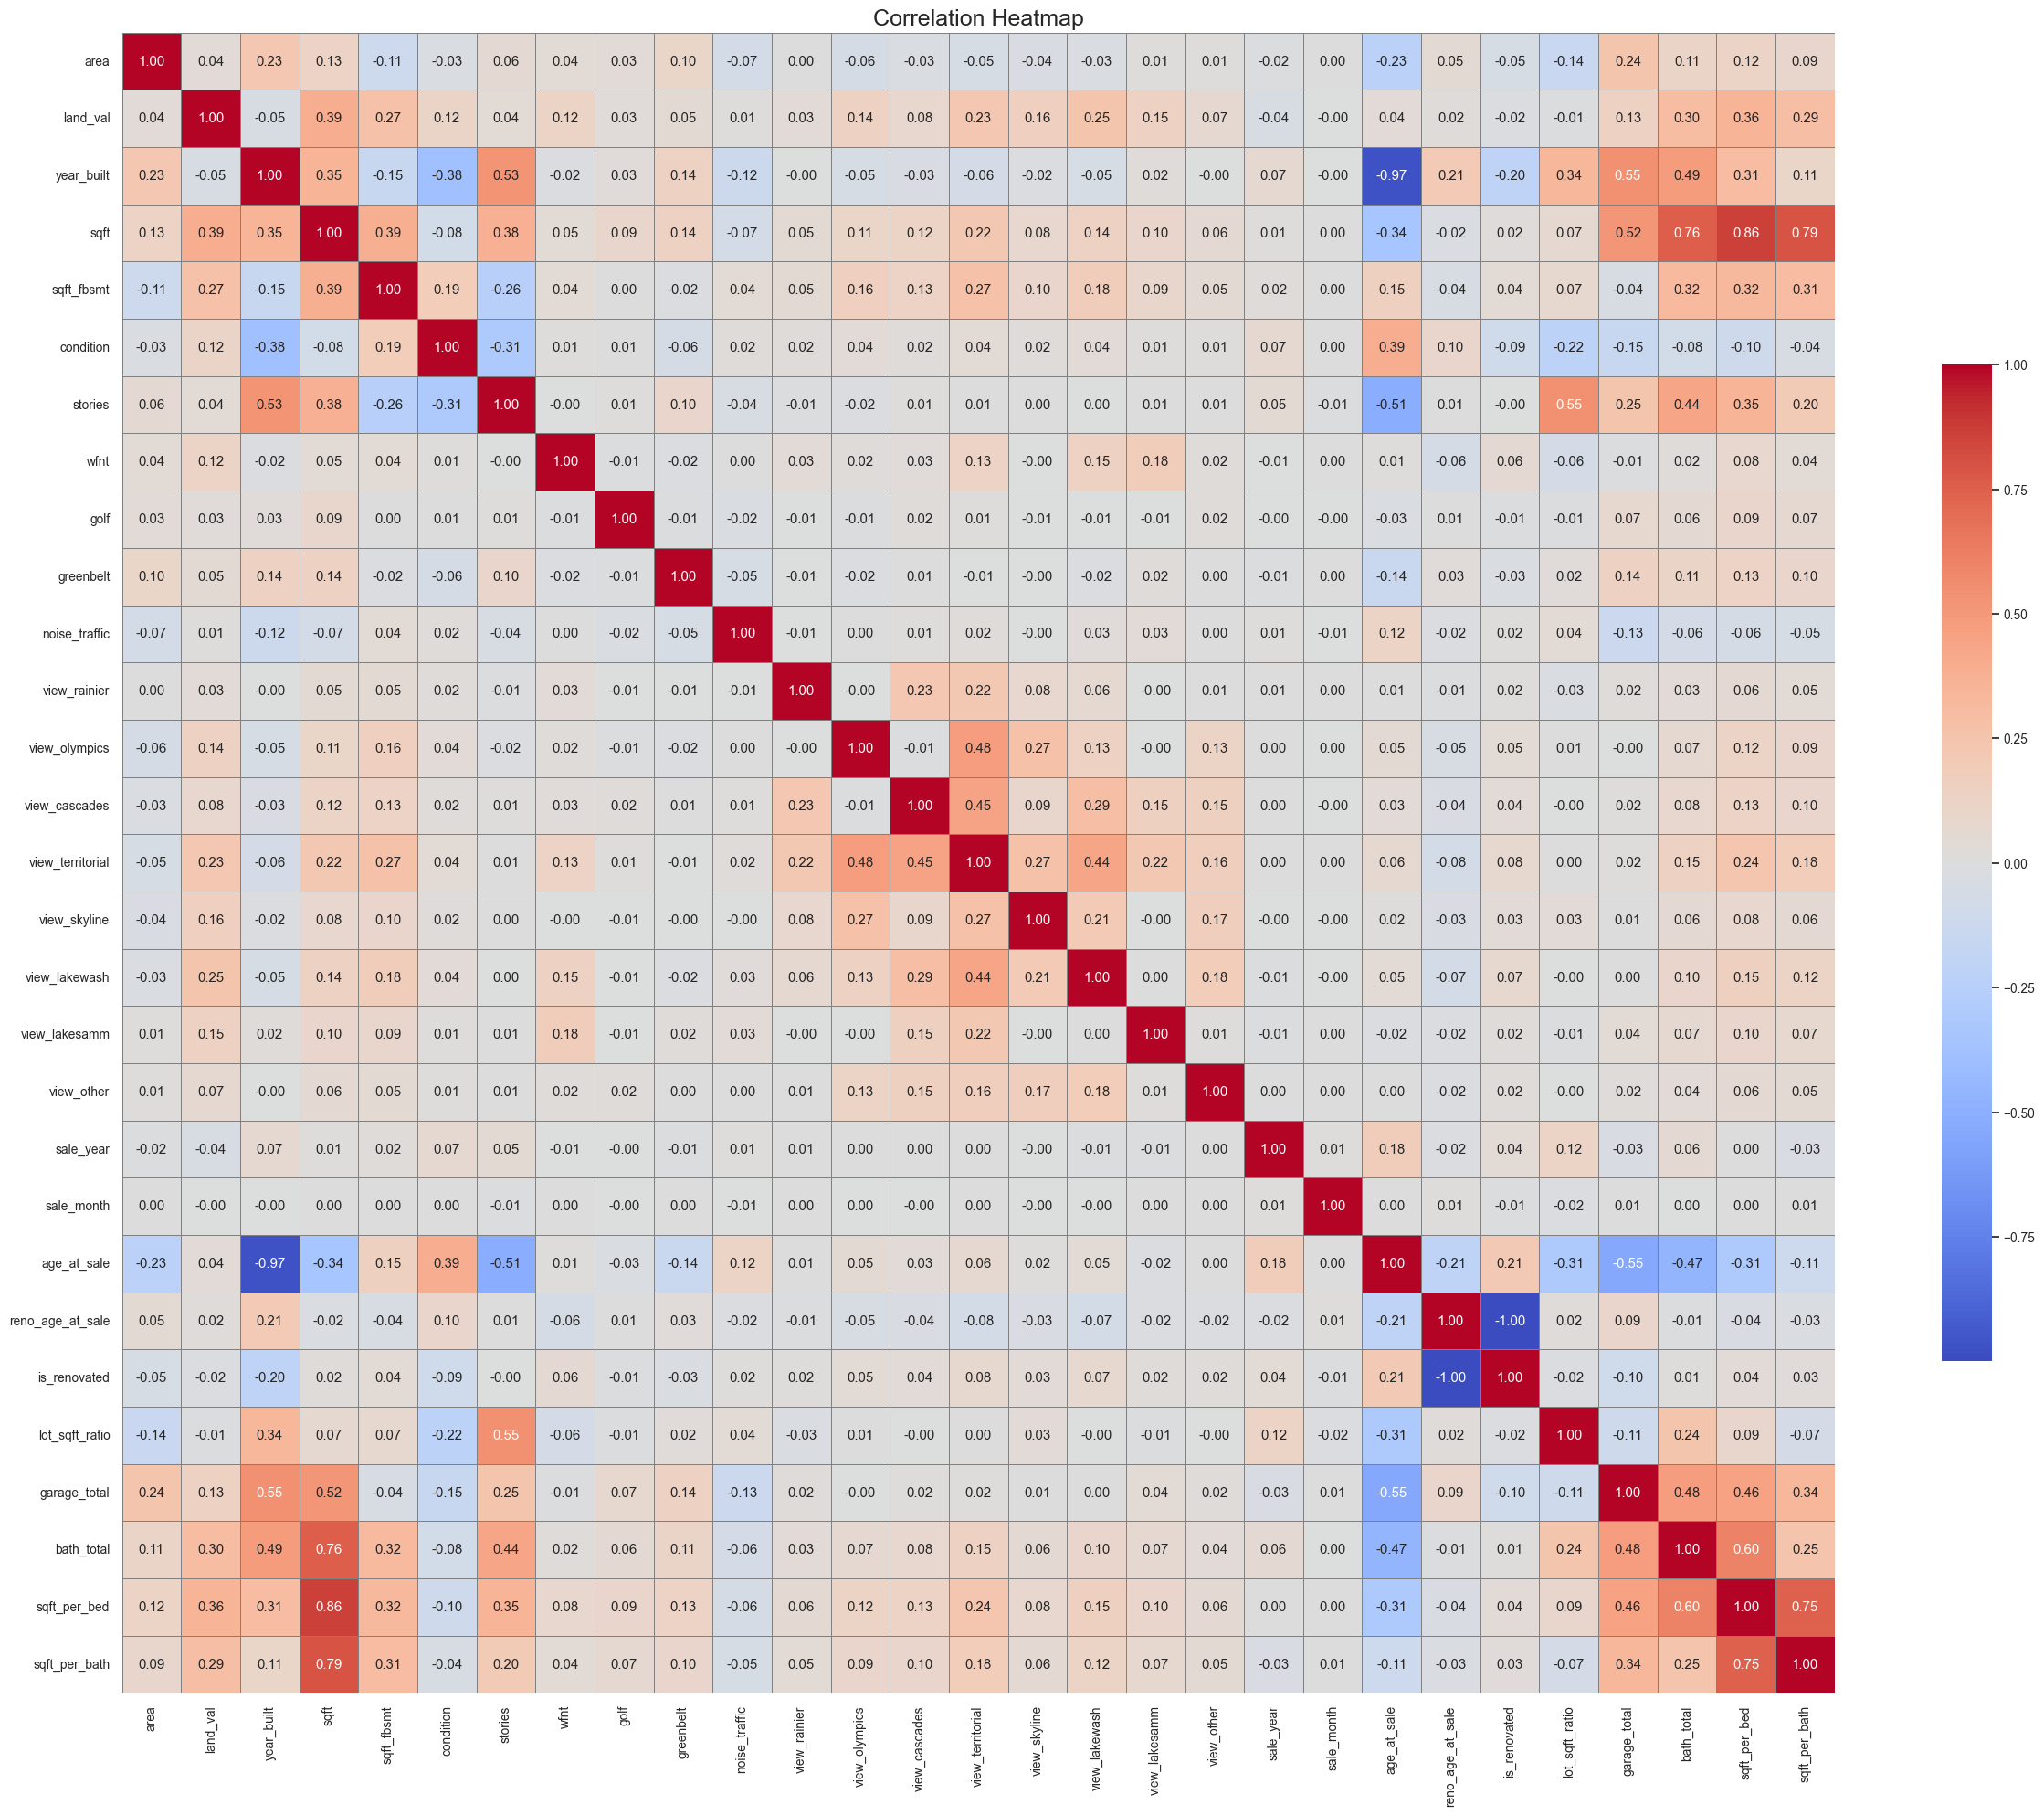

In [37]:
df_corr = data.drop(columns=["sale_price"])
plt.figure(figsize=(25, 20))  
sns.set(font_scale=0.9)      

sns.heatmap(
    df_corr.corr(numeric_only=True), 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': 0.6}  
)

plt.title("Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()